In [ ]:
# Compare the tracking results of different levels of video compression


In [102]:
import os
import glob
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [103]:
true_labeled_csv = '/home/yiting/Documents/Jarvis_projects/Datasets/annotations/compression_comparison_video/2024-02-25/output_comp0/annotations.csv'
df1 = pd.read_csv(true_labeled_csv, on_bad_lines='skip', header = None, index_col=0) 
df2 = pd.read_csv(true_labeled_csv, skiprows=4, header = None, index_col=0) 
last_column = df2.shape[1]
df2 = df2.drop(columns=[last_column],axis='columns')
df_true = pd.concat([df1,df2])
isbodyparts = [x == 'bodyparts' for x in df_true.index.values]
bodyparts = np.unique(df_true.iloc[isbodyparts].values[0])

In [110]:
compressed_folder = r"/home/yiting/Documents/LP_projects/LP_240220/predictions/compression_comparison"
compressed_labeled_csvs = [filename for filename in os.listdir(compressed_folder) if filename.endswith('.csv')]
frame_names = [os.path.splitext(framename)[0] for framename in df_true.index.values[4:]]
frame_idxes = [int(frame_name[6:])for frame_name in frame_names]
error_mean = np.full([len(compressed_labeled_csvs),1],np.nan)
error_std = np.full([len(compressed_labeled_csvs),1],np.nan)
comp_level = np.full((len(compressed_labeled_csvs),1), np.nan)
for i,csv in enumerate(compressed_labeled_csvs):
    compressed_labeled_csv = os.path.join(compressed_folder,csv)
    df_compressed = pd.read_csv(compressed_labeled_csv, header = None, index_col=0) 
    # reorder df_compressed
    df_compressed = df_compressed.iloc[:,[27,28,29,30,31,32,33,34,35,18,19,20,21,22,23,24,25,26,9,10,11,12,13,14,15,16,17,0,1,2,3,4,5,6,7,8]]
    comp_name = csv[11:13]
    if comp_name[1] == '_':
        comp_level[i] = int(comp_name[0])
    else:
        comp_level[i] = int(comp_name)
    errors = np.full([len(frame_idxes), len(bodyparts)],np.nan)
    for bd_idx, bd in enumerate(bodyparts):
        for k, frame_idx in enumerate(frame_idxes):
            true_row_idx = k + 4
            compressed_row_idx = frame_idx + 3
            true_x = df_true.iloc[true_row_idx, bd_idx*3]
            true_y = df_true.iloc[true_row_idx, bd_idx*3 + 1] 
            compressed_x = float(df_compressed.iloc[compressed_row_idx, bd_idx*3])
            compressed_y = float(df_compressed.iloc[compressed_row_idx, bd_idx*3 + 1])
            v = [abs(compressed_x - true_x), abs(compressed_y - true_y)]
            errors[k, bd_idx] = np.linalg.norm(v)

            error_mean[i] = np.nanmean(errors)
            error_std[i] = np.nanstd(errors)


/tmp/ipykernel_3441209/938379596.py:30: RuntimeWarning: Mean of empty slice
  error_mean[i] = np.nanmean(errors)
/home/yiting/anaconda3/envs/ltg_pose/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_3441209/938379596.py:30: RuntimeWarning: Mean of empty slice
  error_mean[i] = np.nanmean(errors)
/home/yiting/anaconda3/envs/ltg_pose/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_3441209/938379596.py:30: RuntimeWarning: Mean of empty slice
  error_mean[i] = np.nanmean(errors)
/home/yiting/anaconda3/envs/ltg_pose/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_3441209/93837959

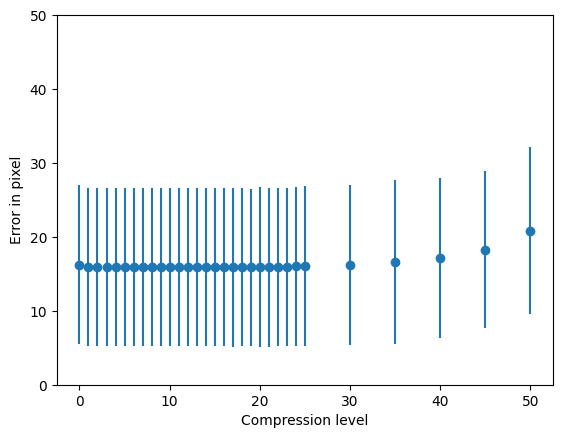

In [111]:
x = comp_level.flatten()
y = error_mean.flatten()
error_bar = error_std.flatten()
plt.errorbar(x, y, yerr = error_bar, fmt = 'o')
plt.ylim([0,50])
plt.ylabel('Error in pixel')
plt.xlabel('Compression level')
plt.savefig('/home/yiting/Documents/LP_projects/LP_240220/predictions/compression_comparison/compression_comparison.jpg')
